<a href="https://colab.research.google.com/github/contreras-juan/UPTC_Diplomado_Ciencia_de_Datos/blob/main/metodos_supervisados/Regresión_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<img src="https://storage.googleapis.com/adonaivera_certified/banner.png">
    
##  Diplomado en Ciencia de Datos - Cohorte 2024

Autor: [Juan Felipe Contreras](https://www.linkedin.com/in/juanf-contreras/)

<h1 align='center'> Regresión Lineal </h1>

<h2> Introducción </h2>

Una de las técnicas más utilizadas en estadística para intentar predecir o explicar una variable numérica continua es la **regresión lineal**. El término "regresión" fue acuñado por sir Francis Galton (primo de Charles Darwin), quién utilizó esta técnica para explorar la relación entre la altura de padres e hijos. Esta es una técnica fundamental en el campo de la ciencia de datos, se presenta como un poderoso instrumento analítico que permite modelar y comprender las relaciones lineales entre variables. En la ciencia de datos, la Regresión Lineal emerge como una herramienta crucial para la predicción, la inferencia estadística y la explicación de fenómenos estadísticos. Este método se basa en la suposición de una relación lineal entre una variable dependiente y una o más variables independientes, buscando identificar el mejor ajuste lineal posible.

<h2> Regresión lineal simple </h2>

La forma en que representamos el modelo de regresión lineal es como una función lineal. Sea $y$ una variable que queremos explicar por medio de la variable $x$, entonces podemos expresar a $y$ como una función de $x$:

$$y = f(x) = \alpha + \beta x + \epsilon$$

donde $\epsilon$ es una variable aleatoria que representa la diferencia entre $y$, y su predicción, $\hat{y}$. Dicho de otra manera:

$$\hat{y} = \alpha + \beta x$$

Así,

$$\epsilon = y - \hat{y} = y - (\alpha + \beta x)$$

Note, a su vez, que al asumir $y$ como una función lineal de $x$ podemos aplicar las propiedades del valor esperado, por lo que:

$$E[y] = \alpha + \beta E[x] + E[\epsilon]$$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

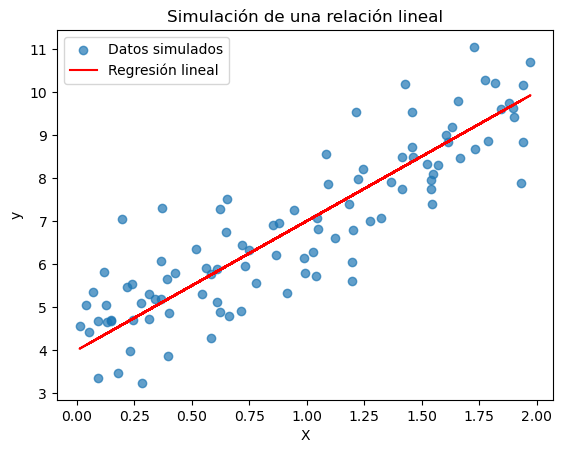

In [2]:
# Simular datos aleatorios
np.random.seed(42)  # Generar semilla
X = 2 * np.random.rand(100, 1)  # Variable independiente
y = 4 + 3 * X + np.random.randn(100, 1)  # Relación lineal con ruido

# Gráfico de datos simulados
plt.scatter(X, y, alpha=0.7, label='Datos simulados')
plt.plot(X, 4 + 3 * X, color='red', label='Regresión lineal')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Simulación de una relación lineal')
plt.legend()
plt.show()

**Supuestos del modelo de regresión lineal**

1. Linealidad: Se asume que la relación entre la variable $x$ y la variable $y$ puede ser expresada como una función lineal

2. Independencia: Cada observación es independiente de otra; es decir, el valor de la variable $x$ para el individuo $i$ no se relaciona de ninguna manera con el valor respectivo de la observaciones $i + p$, para todo $p \in \mathit{R}$

3. Homoscedasticidad: La varianza de los errores es independiente del valor de $x$, esto es:

$$V[\epsilon \vert x] = \sigma_{\epsilon} ^{2}$$

4. Normalidad del error: Se asume que $\epsilon \sim N(0, \sigma_{\epsilon}^{2})$. Esto se puede asumir gracias al Teorema del Límite Central.




**Interpretación de los parámetros del modelo de regresión**

Note que el modelo de regresión lineal consiste en la estimación de una ecuación lineal, por lo que sus anatomías coinciden. El modelo consiste en la estimación del intercepto con el eje $y$ y la pendiente de una línea recta en el plano $xy$, por lo que podemos dar las siguientes interpretaciones:

- $\alpha$: Valor en el que el modelo cruza el eje $y$. También puede interpretarse como la respuesta a la pregunta "¿Cuál es el valor esperado de $y$ cuándo $x = 0$?. Esto se sigue de que

$$E[y | x = 0] = \alpha + \beta (0) + E[\epsilon] = \alpha$$

- $\beta$: Pendiente de la ecuación de $y$. También puede interpretarse como la respuesta a la pregunta "¿Cuánto cambia $y$ cuándo $x$ incrementa en una unidad?". Esto se sigue de que

$$\frac{\partial E[y]}{\partial x} = \frac{\partial (\alpha + \beta x)}{\partial x} = \beta$$

**Mínimos Cuadrados Ordinarios**

Una de las preguntas principales es cómo podemos encontrar $\alpha$ y $\beta$ en la ecuación anterior; para esto, definimos una función de pérdida que mida qué tan lejos se encuentra el modelo de la realidad (con base en los datos de muestra). Es decir, que el interés se encuentra en resolver el siguiente problema:

$$(\alpha, \beta) = \arg \min_{\alpha, \beta} h(\epsilon)$$

El método más famoso para resolver este problema se conoce con el nombre de **Mínimos Cuadrados Ordinarios**, y consiste en definir la función de pérdida de la siguiente manera:

$$h(\epsilon) = \frac{1}{N} \sum_{i=1}^{n} \epsilon^{2} = \frac{1}{n} \sum_{1}^{N} (y - \alpha - \beta x)^2$$

A esta ecuación se le conoce con el nombre de **Error Cuadrático Medio**, y si la utilizamos para resolver el problema de minimización de la función de pérdida obtendremos los estimadores de **Mínimos Cuadrados Ordinarios**:

$$ \beta^{*} = \frac{Cov(x, y)}{Var(x)}$$
$$ \alpha^{*} = \bar{y} - \beta^{*} \bar{x} $$

En dónde:

- $Cov(x, y)$: Covarianza entre $x$ e $y$
- $Var(x)$: Varianza de $x$
- $\bar{x}$: Media muestral de $x$
- $\bar{y}$: Media muestral de $y$
- $\beta^{*}$: Valor óptimo de $\beta$
- $\alpha^{*}$: Valor óptimo de $\alpha$

<h3> Medidas de robustez </h3>

Una vez estimado nuestro modelo de regresión, una pregunta importante que vale la pena hacerse es: ¿Qué tan bien nuestro modelo predice, o es capaz de explicar, la variable de respuesta $y$.

1. $R^2$: R-CuadradoR-cuadrado es una métrica de rendimiento útil para comprender qué tan bien el modelo de regresión se ha ajustado sobre los datos de entrenamiento. Por ejemplo, un R-cuadrado del 80% revela que el modelo es capaz de capturar el 80% de la variación en la variable dependiente. Un valor de R-cuadrado más alto indica un mejor ajuste para el modelo. Se obtiene de la siguiente manera:

- Calculamos la suma de cuadrados del error de la regresión:

$$SS_{res} = \sum_{i=1} ^{N} \epsilon_{i} ^2$$

- Calculamos la suma de cuadrados totales de la regresión:

$$SS_{tot} = \sum_{i=1}^{N} (y_{i} - \bar{y}_{i})^2$$

- Obtenemos el $R^2$:

$$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$

2. $RMSE$: RMSE significa Raíz del Error Cuadrático Medio. Se calcula como la raíz cuadrada de la media de las diferencias al cuadrado entre la salida real y las predicciones. Cuanto menor sea el RMSE, mejor será el rendimiento del modelo. Matemáticamente, puede expresarse de la siguiente manera:

$$RMSE = \sqrt{\frac{1}{N} \sum_{i = 1}^{N} (y_{i} - \alpha^{*} - \beta^{*}x_{i})^2}$$

3. $MAE$: El MAE, o Error Absoluto Medio, es una métrica importante en la evaluación de modelos de regresión. Se calcula como la media de las diferencias absolutas entre las predicciones del modelo y los valores reales. Un MAE más bajo indica un mejor rendimiento del modelo. Matemáticamente, se puede definir de la siguiente manera:

$$MAE = \frac{1}{N} \sum_{i=1}^{N}\vert y_{i} - \hat{y}_{i} \vert $$

<h3> Ejemplo práctico </h3>

Para el siguiente ejercicio práctico aprovecharemos un ejemplo del libro [*Hands-On Machine Learning With Scikit-Learn, Keras and Tensorflow*](https://github.com/ageron/handson-ml3/tree/main) en el que se analiza la relación entre la satisfacción de vida de las personas y el PIB per cápita en los países de la OCDE. Para esto, se usan dos fuentes de informació, los datos de la [OCDE](https://www.oecdbetterlifeindex.org/#/11111111111) sobre satisfacción con la vida, y la información del [Fondo Monetario Internacional](https://www.imf.org/external/datamapper/NGDP_RPCH@WEO/OEMDC/ADVEC/WEOWORLD) sobre el crecimiento económico de los países. 

In [3]:
import urllib.request
from pathlib import Path

In [4]:
# Este código permite llamar los datos que se ecuentran en el repositorio del libro

datapath = Path() / "datasets" / "lifesat"
datapath.mkdir(parents=True, exist_ok=True)

data_root = "https://github.com/ageron/data/raw/main/"
for filename in ("oecd_bli.csv", "gdp_per_capita.csv"):
    if not (datapath / filename).is_file():
        print("Downloading", filename)
        url = data_root + "lifesat/" + filename
        urllib.request.urlretrieve(url, datapath / filename)

In [5]:
# Se importan los datos a Pandas
oecd_bli = pd.read_csv(datapath / "oecd_bli.csv")
gdp_per_capita = pd.read_csv(datapath / "gdp_per_capita.csv")

In [6]:
gdp_year = 2020
gdppc_col = "GDP per capita (USD)"
lifesat_col = "Life satisfaction"

gdp_per_capita = gdp_per_capita[gdp_per_capita["Year"] == gdp_year]
gdp_per_capita = gdp_per_capita.drop(["Code", "Year"], axis=1)
gdp_per_capita.columns = ["Country", gdppc_col]
gdp_per_capita.set_index("Country", inplace=True)

gdp_per_capita.head()

,GDP per capita (USD)
Country,
Afghanistan,1978.961579
Africa Eastern and Southern,3387.594670
Africa Western and Central,4003.158913
Albania,13295.410885
Algeria,10681.679297


In [7]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

oecd_bli.head()

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3


In [8]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                              left_index=True, right_index=True)
full_country_stats.sort_values(by=gdppc_col, inplace=True)
full_country_stats = full_country_stats[[gdppc_col, lifesat_col]]

full_country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5


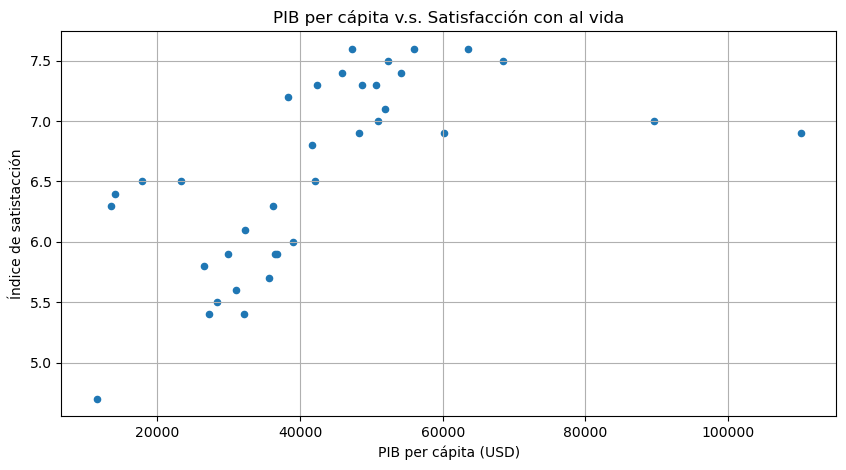

In [9]:
full_country_stats.plot(kind='scatter', figsize=(10, 5), grid=True,
                        x=gdppc_col, y=lifesat_col)

plt.xlabel('PIB per cápita (USD)');
plt.ylabel('Índice de satistacción');
plt.title('PIB per cápita v.s. Satisfacción con al vida');

In [10]:
min_gdp = 23_500
max_gdp = 62_500

country_stats = full_country_stats[(full_country_stats[gdppc_col] >= min_gdp) &
                                   (full_country_stats[gdppc_col] <= max_gdp)]
country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
Russia,26456.387938,5.8
Greece,27287.083401,5.4
Turkey,28384.987785,5.5
Latvia,29932.493910,5.9
Hungary,31007.768407,5.6


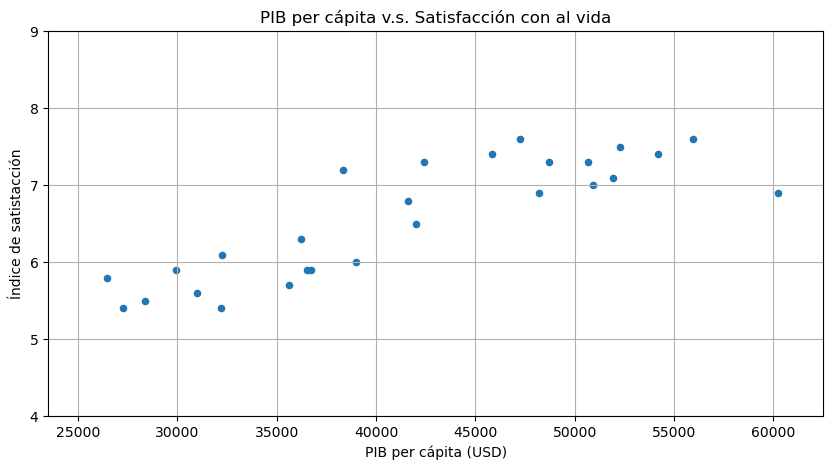

In [11]:
country_stats.plot(kind='scatter', figsize=(10, 5), grid=True,
                   x=gdppc_col, y=lifesat_col)

min_life_sat = 4
max_life_sat = 9

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

plt.xlabel('PIB per cápita (USD)');
plt.ylabel('Índice de satistacción');
plt.title('PIB per cápita v.s. Satisfacción con al vida');

In [12]:
from sklearn import linear_model

X_sample = country_stats[[gdppc_col]].values
y_sample = country_stats[[lifesat_col]].values

lin1 = linear_model.LinearRegression()
lin1.fit(X_sample, y_sample)

t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
print(f"ɑ={t0:.2f}, β={t1:.2e}")

ɑ=3.75, β=6.78e-05


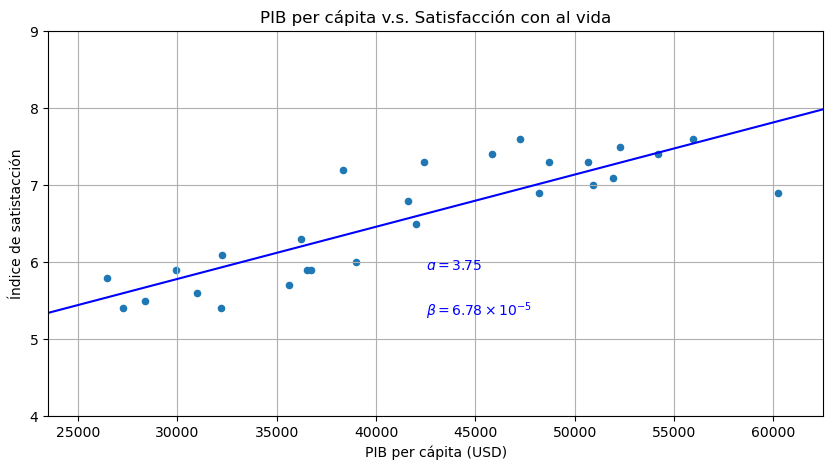

In [13]:
country_stats.plot(kind='scatter', figsize=(10, 5), grid=True,
                   x=gdppc_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)
plt.plot(X, t0 + t1 * X, "b")

plt.text(max_gdp - 20_000, min_life_sat + 1.9,
         fr"$ɑ = {t0:.2f}$", color="b")
plt.text(max_gdp - 20_000, min_life_sat + 1.3,
         fr"$β = {t1 * 1e5:.2f} \times 10^{{-5}}$", color="b")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])
plt.xlabel('PIB per cápita (USD)');
plt.ylabel('Índice de satistacción');
plt.title('PIB per cápita v.s. Satisfacción con al vida');
plt.show()

<h2> Regresión Lineal Múltiple: un escenario más realista

Si bien el caso de regresión lineal simple es interesante y permite explorar la relación entre dos variables, es un escenario muy idealista y no permite abordar los casos más reales. De esta manera, extendemos la definición a múltiples variables y definimos el modelo de regresión lineal múltiple como:

$$y_{i} = \beta_{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + \cdots + \beta_{k} x_{k} + \epsilon_{i}$$

Considerando una muestra de $N$ individuos, el modelo se puede expresar matricialmente como

$$ \mathbf{Y} = \mathbf{X}\mathbf{\beta} + \mathbf{e} =  \begin{pmatrix}
1 & x_{11} &  \cdots& x_{1k} \\
1 & x_{21} & \cdots & x_{2k} \\
 \vdots & \vdots & \ddots & \vdots \\
1 & x_{n1} & \cdots & x_{nk} \\
\end{pmatrix} \begin{pmatrix}
 \beta_0 \\
 \beta_1 \\
 \vdots \\
 \beta_k
\end{pmatrix} + \begin{pmatrix}
 \epsilon_1 \\
 \epsilon_2 \\
 \vdots \\
 \epsilon_N
\end{pmatrix} $$

Y la función de pérdida de **Mínimos Cuadrados Ordinarios** es:

$$ \mathbf{e} ^{T} \mathbf{e}= (\mathbf{Y} - \mathbf{X}\mathbf{\beta})^{T} (\mathbf{Y} - \mathbf{X}\mathbf{\beta})$$

Y la solución del problema de minimización es:

$$\mathbf{\beta}^{*} = \left(\mathbf{X}^T \mathbf{X} \right)^{-1} \mathbf{X}^{T} \mathbf{Y}$$

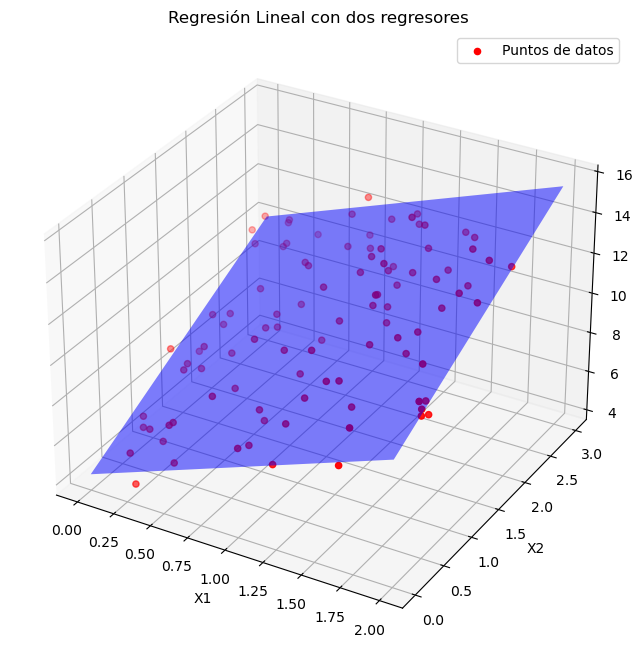

In [14]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# Generating random data
np.random.seed(0)
n_samples = 100
X1 = 2 * np.random.rand(n_samples, 1)
X2 = 3 * np.random.rand(n_samples, 1)
y = 4 + 3 * X1 + 2 * X2 + np.random.randn(n_samples, 1)

# Fit linear regression model
reg = LinearRegression()
X = np.hstack((X1, X2))
reg.fit(X, y)
coef = reg.coef_
intercept = reg.intercept_

# Create meshgrid for plotting
x1_range = np.linspace(0, 2, 10)
x2_range = np.linspace(0, 3, 10)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)
y_pred_mesh = intercept + coef[0][0] * x1_mesh + coef[0][1] * x2_mesh

# Plotting
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X1, X2, y, color='red', label='Puntos de datos')
ax.plot_surface(x1_mesh, x2_mesh, y_pred_mesh, alpha=0.5, rstride=100, cstride=100, color='blue')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

plt.title('Regresión Lineal con dos regresores')
plt.legend()
plt.show()

<h2> Más sobre regresión lineal </h2>

<h3> Regresión polinómica y logarítmica</h3>


Una vez comprendido el modelo de regresión lineal, vale la pena pensar en si la misma teoría es útil para explicar relaciones no lineales entre variables, y la respuesta es "sí". En particular, considere los siguientes modelos de regresión:

$$y_{i} = \beta_{0} + \beta_{1} x_{i1} + \beta_{2} x_{i2}^{2} + \beta_{3} x_{i3}^{3} + \epsilon_{i}$$
$$y_{i} = \beta_{0} + \beta_{1} ln(x_{i}) + z_{i} + \epsilon$$
$$ln(y_{i}) = \beta_{0} + ln(x_{i}) + \epsilon$$

Aunque, pueda ser sorprendente (y, contraintuitivo al comienzo), **TODOS ESTOS EJEMPLOS SON CASOS PARTICULARES DEL MODELO DE REGRESIÓN LINEAL**. Para entender porqué, utilicemos el primer ejemplo, y definamos un modelo de regresión lineal con tres regresores:

$$y_{i} = \beta_{0} + \beta_{1} x_{i} + \beta_2 z_{i} + \beta_{3} w_{i} + \epsilon_i$$

Claramente, esta ecuación es lineal en $x$, $z$ y $w$, así que basta con hacer $z = x^2$ y $w = x^3$ para obtener el modelo de regresión de nuestro ejemplo. Y, el mismo ejercicio puede hacerse aplicando cualquier otro tipo de función (P.ej. Logarítmica, exponencial, radical).

**Interpretación de los parámetros del modelo logarítmico**

| Nombre del modelo | Ecuación | Escala de y | Escala de x | Interpretación de $\beta$|
| --- | --- | --- | --- | --- |
| $$\text{lin - lin}$$ | $$y = \alpha + \beta x$$ | $$y$$ | $$x$$ | Si $x$ cambia en una unidad, $y$ cambia en $\beta$ unidades|
| $$\text{log - lin}$$ | $$ln(y) = \alpha + \beta x$$ | $$ln(y)$$ | $$x$$ |Si $x$ cambia en una unidad, $y$ cambia en $\beta * 100$ % |
| $$\text{lin - log}$$ | $$y = \alpha + \beta ln(x)$$ | $$y$$ | $$ln(x)$$ | Si $x$ cambia en un $1 \%$, $y$ cambia en $\beta /100$ unidades |
| $$\text{log - log}$$ | $$ln(y) = \alpha + \beta ln(x)$$ | $$ln(y)$$ | $$ln(x)$$ | Si $x$ cambia en un $1 \%$, $y$ cambia en un $\beta \%$|

<h3> Regresión LASSO </h3>

La regresión LASSO es un caso de regularización del modelo de regresión lineal, típicamente conocido también como regularización L1. En particular, corresponde al mismo modelo que ya vimos previamente, pero definimos la función de pérdida como:

$$h(\mathbf{\beta}) = \mathbf{e}^T \mathbf{e} + \alpha \sum_{i=1}^{N} \vert \beta_{i} \vert$$

Esta función de pérdida corresponde a encontrar:

$$\mathbf{\beta}^{*} = \arg \min \mathbf{e}^{T} \mathbf{e} \hspace{0.1in} \text{ s.a.} \sum_{i = 1}^N \vert \beta_{i} \vert < \alpha$$

Una característica importante de este modelo es que hemos introducido el parámetro $\alpha$, que indica qué tanto queremos restringir el problema de optimización. Al hacer esto, forzamos al algoritmo de Mínimos Cuadrados Ordinarios a encontrar valores pequeños en varios de los parámetros a estimar, y en algunos casos los hace ser $0$. En muchos casos, esta técnica mejora los resultados de predicción del modelo de regresión lineal y evita el sobreentrenamiento.

En aplicaciones explicativas (no predictivas), la regresión LASSO ayuda a determinar qué regresores son más relevantes para explicar la variable dependiente, $y$.

In [15]:
np.random.seed(42)
m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * x ** 2 + x + 2 + 3*np.random.randn(m, 1)

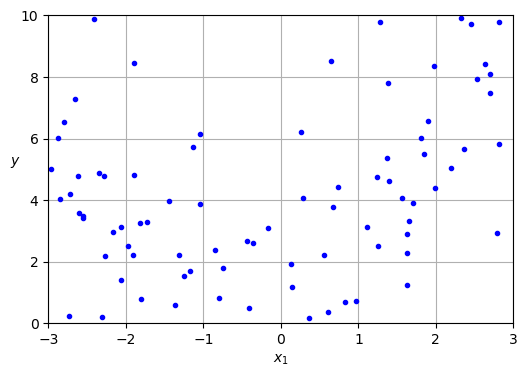

In [16]:
# extra code – this cell generates and saves Figure 4–12
plt.figure(figsize=(6, 4))
plt.plot(x, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(x)
x[0]

array([-0.75275929])

In [18]:
print(x.shape)
print(X_poly.shape)

(100, 1)
(100, 2)


In [19]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x, y)

Lasso(alpha=0.1)

In [20]:
model = Lasso(alpha=0.1)
model = make_pipeline(PolynomialFeatures(degree=10), 
                      StandardScaler(),
                      model)

In [21]:
model.fit(x, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=10)),
                ('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.1))])

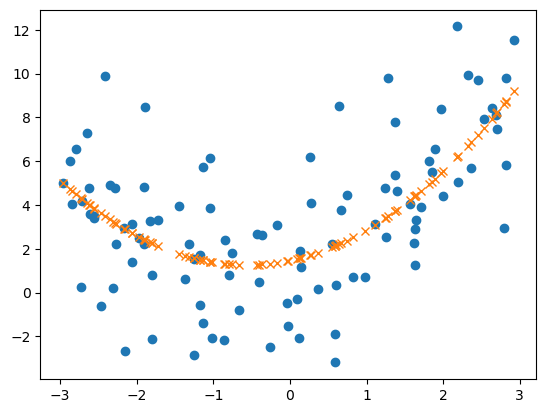

In [22]:
y_hat = model.predict(x)
plt.plot(x, y, 'o')
plt.plot(x, y_hat, 'x')

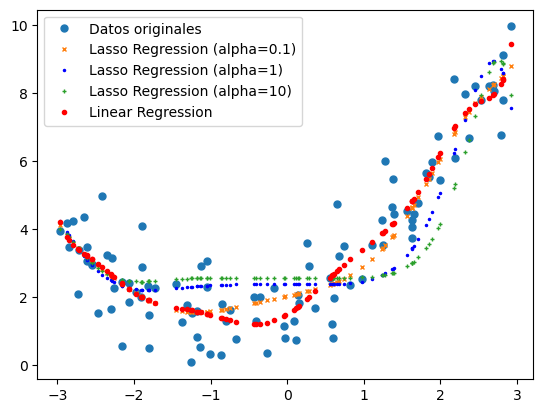

In [23]:
from sklearn.metrics import mean_squared_error


np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

# Polynomial features
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Plot original data
plt.plot(X, y, 'o', label='Datos originales', markersize=5)

mse_dict = {}

# Lasso regression with different alpha values
alpha_values = [0.1, 1, 10]
for alpha, style in zip(alpha_values, ('x', 'b.', '+', '>')):
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_poly, y)
    y_pred = lasso_reg.predict(X_poly)
    mse = mean_squared_error(y, y_pred)
    
    model_name = f'Regresión LASSO (alpha: {alpha})'
    mse_dict[model_name] = mse

    # Plot Lasso regression lines
    plt.plot(X, y_pred, style, label=f'Lasso Regression (alpha={alpha})', markersize=3)

plt.plot(X, lin_reg.predict(X_poly), 'o',label='Linear Regression', color='r', markersize=3)
plt.legend()
plt.show()

mse = mean_squared_error(y, lin_reg.predict(X_poly))

mse_dict['Regresión clásica'] = mse

In [24]:
import pandas as pd
mse_df = pd.DataFrame.from_dict(mse_dict, orient='index')
mse_df.columns = ['MSE']
mse_df

,MSE
Regresión LASSO (alpha: 0.1),0.814976
Regresión LASSO (alpha: 1),1.389765
Regresión LASSO (alpha: 10),1.797077
Regresión clásica,0.739909


<h3> Regresión Ridge </h3>

La regresión Ridge es otro caso de regularización del modelo de regresión lineal, típicamente conocido también como regularización L2. En este caso, la función de pérdida es

$$h(\beta) = \mathbf{e}^{T} \mathbf{e} + \alpha \sum_{i = 1}^{N} \beta_{i} ^{2}$$

Esta función de pérdida corresponde a encontrar:

$$\arg \min \mathbf{e}^{T} \mathbf{e} \hspace{0.1in} \text{ s.a.} \sum_{i = 1}^N  \beta_{i}^{2} < \alpha$$

Para este caso, el método de Mínimos Cuadrados Ordinarios genera el estimador

$$\beta^{*} = \left( \mathbf{X}^{T} \mathbf{X} + \alpha I \right)^{-1} \mathbf{X}^{T} \mathbf{Y}$$

dónde $I$ corresponde a la matriz identidad, por lo que 

$$\alpha I =  \begin{pmatrix}
\alpha & 0 & \cdots & 0 \\
 0 &  \alpha & \cdots  & 0 \\
 \vdots & \vdots & \ddots & 0 \\
  0& 0 & \cdots & \alpha \\
\end{pmatrix}$$

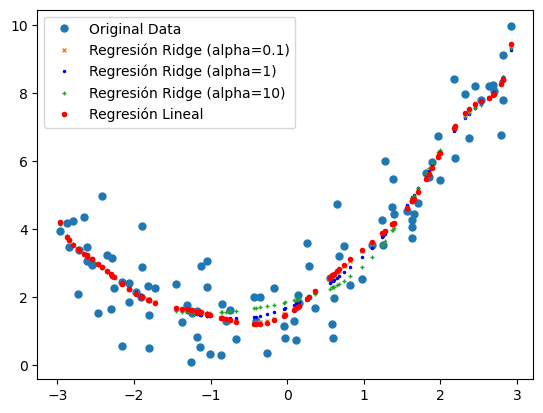

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error


np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

# Polynomial features
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Plot original data
plt.plot(X, y, 'o', label='Original Data', markersize=5)

mse_dict = {}

# Lasso regression with different alpha values
alpha_values = [0.1, 1, 10]
for alpha, style in zip(alpha_values, ('x', 'b.', '+', '>')):
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_poly, y)
    y_pred = ridge_reg.predict(X_poly)
    mse = mean_squared_error(y, y_pred)
    
    model_name = f'Regresión Ridge (alpha: {alpha})'
    mse_dict[model_name] = mse

    # Plot Lasso regression lines
    plt.plot(X, y_pred, style, label=f'Regresión Ridge (alpha={alpha})', markersize=3)

plt.plot(X, lin_reg.predict(X_poly), 'o',label='Regresión Lineal', color='r', markersize=3)
plt.legend()
plt.show()

mse = mean_squared_error(y, lin_reg.predict(X_poly))

mse_dict['Regresión clásica'] = mse

In [26]:
import pandas as pd
mse_df = pd.DataFrame.from_dict(mse_dict, orient='index')
mse_df.columns = ['MSE']
mse_df

,MSE
Regresión Ridge (alpha: 0.1),0.740386
Regresión Ridge (alpha: 1),0.751744
Regresión Ridge (alpha: 10),0.784249
Regresión clásica,0.739909
